# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combine = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
mouse_num = len(mouse_study_combine.groupby('Mouse ID').count())
print(mouse_num)


249


In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicate = mouse_study_combine[mouse_study_combine.duplicated(['Mouse ID', 'Timepoint'])]
print(mouse_duplicate)
mouse_duplicate_ids = mouse_study_combine.loc[mouse_study_combine.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(mouse_duplicate_ids)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  
['g989']


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_combine.loc[mouse_study_combine["Mouse ID"] == "g989"]
duplicate_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mouse_data = mouse_study_combine[mouse_study_combine['Mouse ID'].isin(mouse_duplicate_ids)==False]



In [23]:
# Checking the number of mice in the clean DataFrame.
print(len(updated_mouse_data.groupby('Mouse ID').count()))

248


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Mean of tumor volume for regimen
mean_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean')

#median
median_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median')

#Variance
variance_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Variance')

#Standard Deviation
sd_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Standard_Deviation')

#SEM
sem_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('Standard_Error')


#Dataframe
results_df = pd.DataFrame({'Mean' : mean_tumor_volume,
                           'Median' : median_tumor_volume,
                           'Variance': variance_tumor_volume,
                           'Standard Deviation': sd_tumor_volume,
                           'Standard Error': sem_tumor_volume})

print(results_df)


                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error  
Drug Regimen                  
Capomulin           0.329346  
Ceftamin            0.469821  
Infubinol           0.492236  
Ketapril        

C:\Users\micha\AppData\Local\Temp\ipykernel_44868\3584280952.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean')
C:\Users\micha\AppData\Local\Temp\ipykernel_44868\3584280952.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume = updated_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median')
C:\Users\micha\AppData\Local\Temp\ipykernel_44868\3584280952.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a 

In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = updated_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen on Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

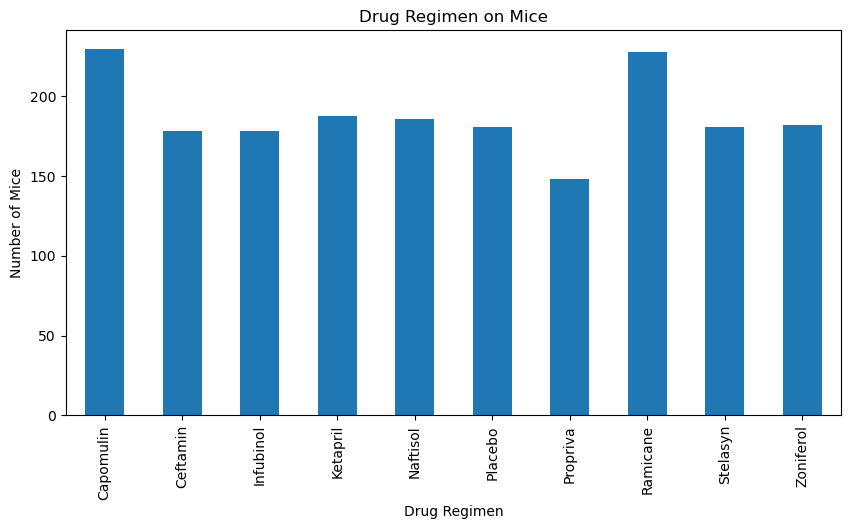

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar = updated_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Mice')

mice_bar.plot.bar(title='Drug Regimen on Mice', y = 'Number of Mice', figsize = (10,5))



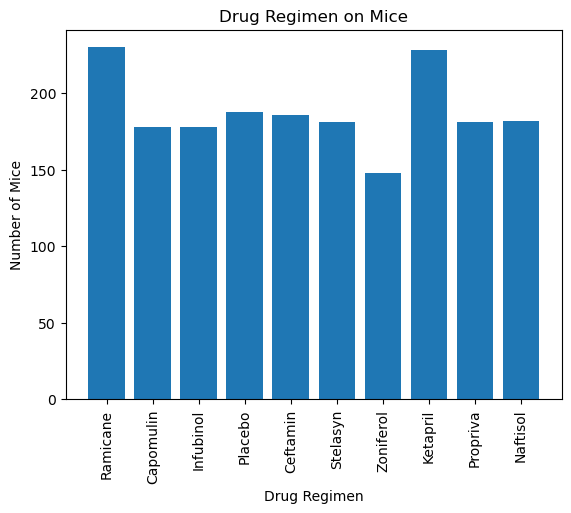

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = updated_mouse_data['Drug Regimen'].unique()

x_axis = drugs
y_axis = updated_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Mice')

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation = 90)
plt.show()

Text(0.5, 1.0, 'Sex Breakdown of Test Mice')

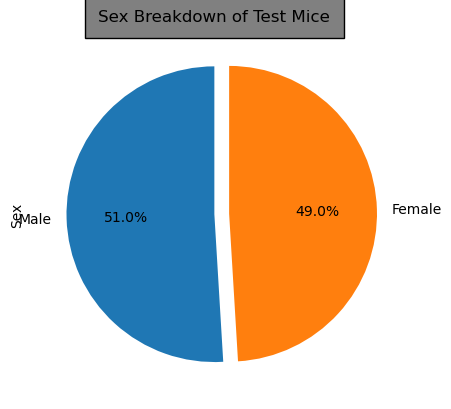

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = updated_mouse_data['Sex'].value_counts()

sex.plot(kind='pie',y='', autopct='%1.1f%%', startangle=90, shadow =False, explode =(0,.1))
plt.title ('Sex Breakdown of Test Mice',bbox={'facecolor':'.5','pad':10})


(-1.1049977227391237,
 1.2049524141830759,
 -1.1001503025552368,
 1.1031578252724032)

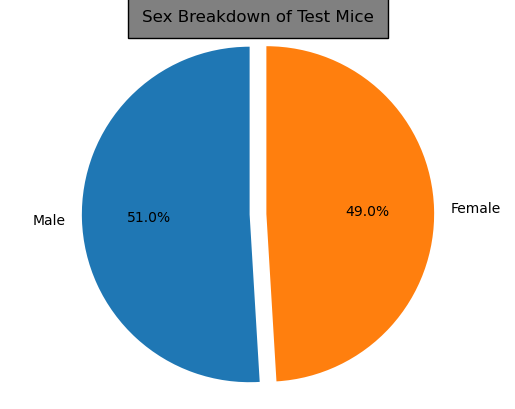

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
#print(sex)
sizes = [958, 922]
explode = (0,.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels = labels, autopct = '%1.1f%%', shadow=False, startangle=90)

plt.title('Sex Breakdown of Test Mice', bbox = {'facecolor': '.5', 'pad':10})

ax1.axis('equal')

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Treat_data = updated_mouse_data.groupby(["Mouse ID"]).max()
reset_data = Treat_data.reset_index()

merged_treat_data = reset_data[['Mouse ID', 'Timepoint']].\
        merge(updated_mouse_data, on=['Mouse ID', 'Timepoint'],how="left")

def get_outliers(regimen):
    drug_data = merged_treat_data.loc[merged_treat_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = drug_data.quantile([.25,.5,.75])
    quart1 = quartiles[0.25]
    quart3 = quartiles[0.75]
    quart_range = quart3 - quart1
    lower_bound = quart1 - (1.5 * quart_range)
    upper_bound = quart3 + (1.5 * quart_range)

    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return drug_data
    
cap_out = get_outliers("Capomulin")
ram_out = get_outliers("Ramicane")
inf_out = get_outliers("Infubinol")
ceft_out = get_outliers("Ceftamin")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treamtments = updated_mouse_data[updated_mouse_data["Drug Regimen"].isin(treatment_list)]
treamtments.head()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = treamtments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)",lambda x: x.iloc[-1]))
greatest_timepoint = greatest_timepoint.stack(level=0).unstack(level=0)

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds

treatmeant = 0
for drug in treatment_list:
    quarts = greatest_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowq = quarts[.25].round(2)
    upperq = quarts[.75].round(2)
    iqr = round(upperq - lowq,2)
    lower_bound = round(lowq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)







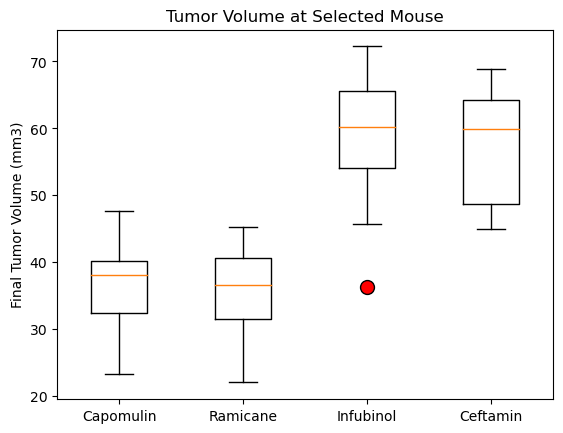

In [140]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize = 10)
plt.boxplot([cap_out, ram_out, inf_out, ceft_out],labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops = red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title ('Tumor Volume at Selected Mouse')

plt.show()


## Line and Scatter Plots

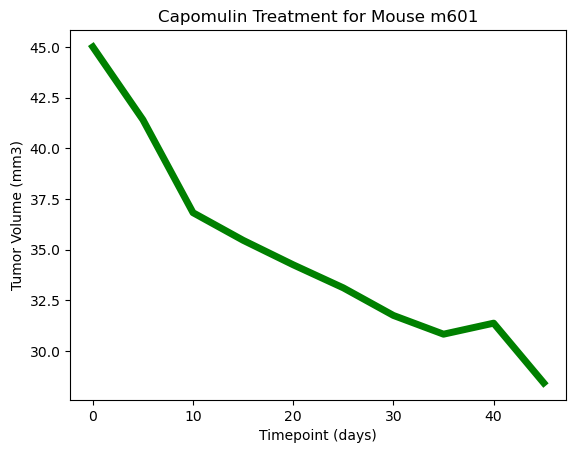

In [152]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = updated_mouse_data.loc[updated_mouse_data["Drug Regimen"] == "Capomulin",:]

m601_df = cap_df.loc[cap_df["Mouse ID"] == "m601",:]
m601_df.head()

x_axis = m601_df["Timepoint"]
tumor_size = m601_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment for Mouse m601')
plt.plot(x_axis, tumor_size, linewidth = 5, color ="green", label = "Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_44868\4079789948.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_weight = cap_df.groupby(['Mouse ID']).mean()


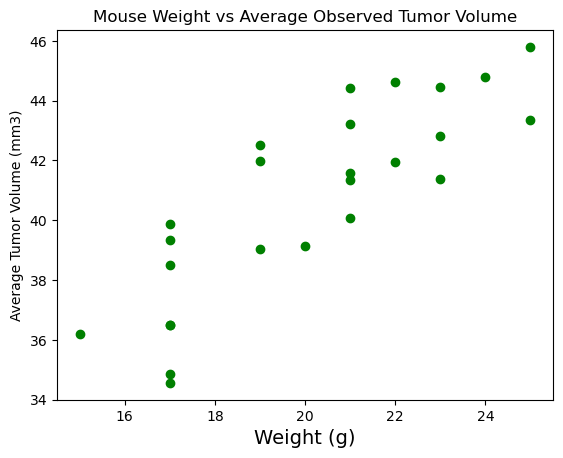

In [155]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
cap_weight = cap_df.groupby(['Mouse ID']).mean()

M_size = 15
plt.scatter(cap_weight['Weight (g)'],cap_weight['Tumor Volume (mm3)'], color ="green")
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Observed Tumor Volume')
plt.show()


## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.84


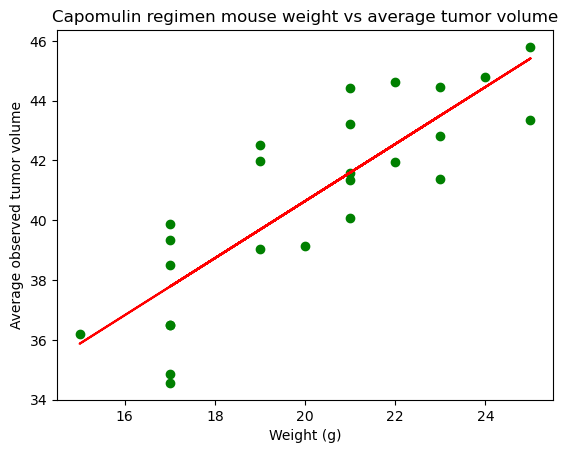

In [165]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_weight['Weight (g)'],cap_weight['Tumor Volume (mm3)'])
print(f"Correlation between mouse weight and average tumor volume: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight["Weight (g)"], cap_weight["Tumor Volume (mm3)"])
Regression_model = cap_weight["Weight (g)"]* slope + intercept


plt.scatter(cap_weight["Weight (g)"], cap_weight["Tumor Volume (mm3)"], color ="green")
plt.plot(cap_weight["Weight (g)"], Regression_model, color = 'red')
plt.xlabel("Weight (g)")
plt.ylabel("Average observed tumor volume")
plt.title("Capomulin regimen mouse weight vs average tumor volume")
plt.show()


